In [1]:
from simpsom import plots as splots
from simpsom.neighborhoods import Neighborhoods
import numpy as np
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.size"] = 14

In [2]:
nei = Neighborhoods(np, 10, 10, 'hexagons', PBC=False)
othernei = Neighborhoods(np, 6, 6, 'hexagons', PBC=True)
coords = nei.coordinates
othercoords = othernei.coordinates
indices = np.arange(len(coords))
outermask = (
    (indices // nei.height < 2) | 
    (indices // nei.height > nei.height - 3) | 
    (indices % nei.width < 2) | 
    (indices % nei.width > nei.width - 3)
)
grid1 = np.arange(nei.width * nei.height).reshape(nei.height, nei.width, order='F')
grid2  = np.arange(othernei.width * othernei.height).reshape(othernei.height, othernei.width, order='F')
theslice = slice(grid2.shape[0] - 2, grid2.shape[0] - 2 + grid1.shape[0])
grid1[:, :2] = np.tile(grid2[:, -2:].T, 3)[:, theslice].T
grid1[:, -2:] = np.tile(grid2[:, :2].T, 3)[:, theslice].T
grid1[:2, :] = np.tile(grid2[-2:, :], 3)[:, theslice]
grid1[-2:, :] = np.tile(grid2[:2, :], 3)[:, theslice]
grid1 = grid1.flatten(order='F')
grid1[~outermask] = grid2.flatten(order='F')

(0.7320507764816284, 7.062177658081055)

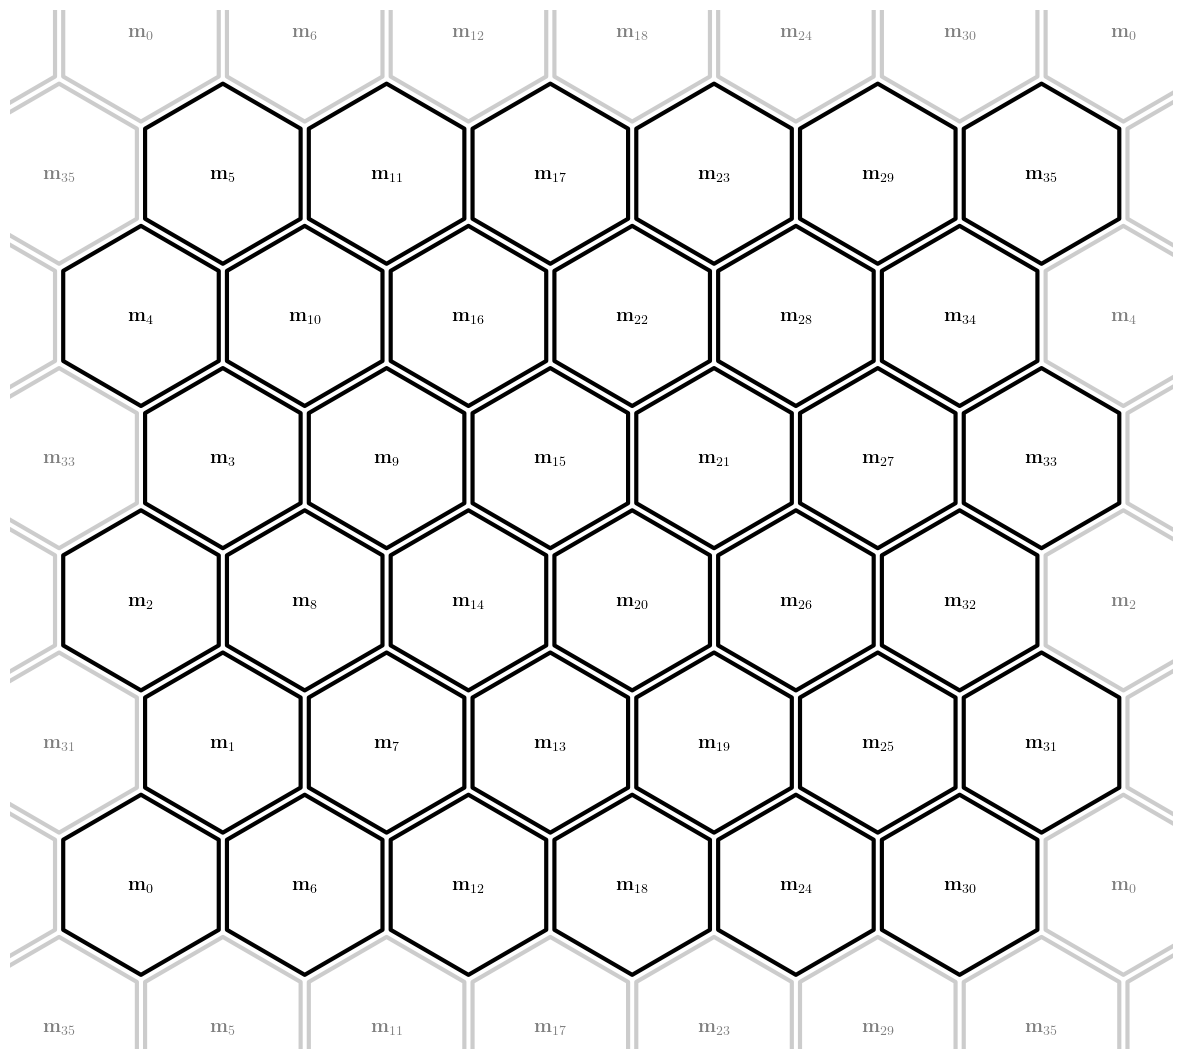

In [9]:
edgecolors = np.full(len(coords), 'black', dtype=object)
edgecolors[outermask] = 'gray'
alphas = np.ones(len(coords))
alphas[outermask] = 0.2
fig, ax = splots.plot_map(
    coords, np.ones(len(coords)), 'hexagons', 
    draw_cbar=False, figsize=(15, 13.5), 
    show=False, edgecolors = 'black', cmap='Greys',
    alphas=alphas, linewidths=3,
)
xlims = [np.amin(coords[~outermask][:, 0]) - 0.8, np.amax(coords[~outermask][:, 0]) + 0.8]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
for i, c in enumerate(coords):
    x, y = c
    if x > xlims[0] and x < xlims[-1] and y > ylims[0] and y < ylims[-1]: 
        ax.text(x, y, r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$', va='center', ha='center', color=edgecolors[i])
ax.set_xlim(xlims)
ax.set_ylim(ylims)

(0.7320507764816284, 7.062177658081055)

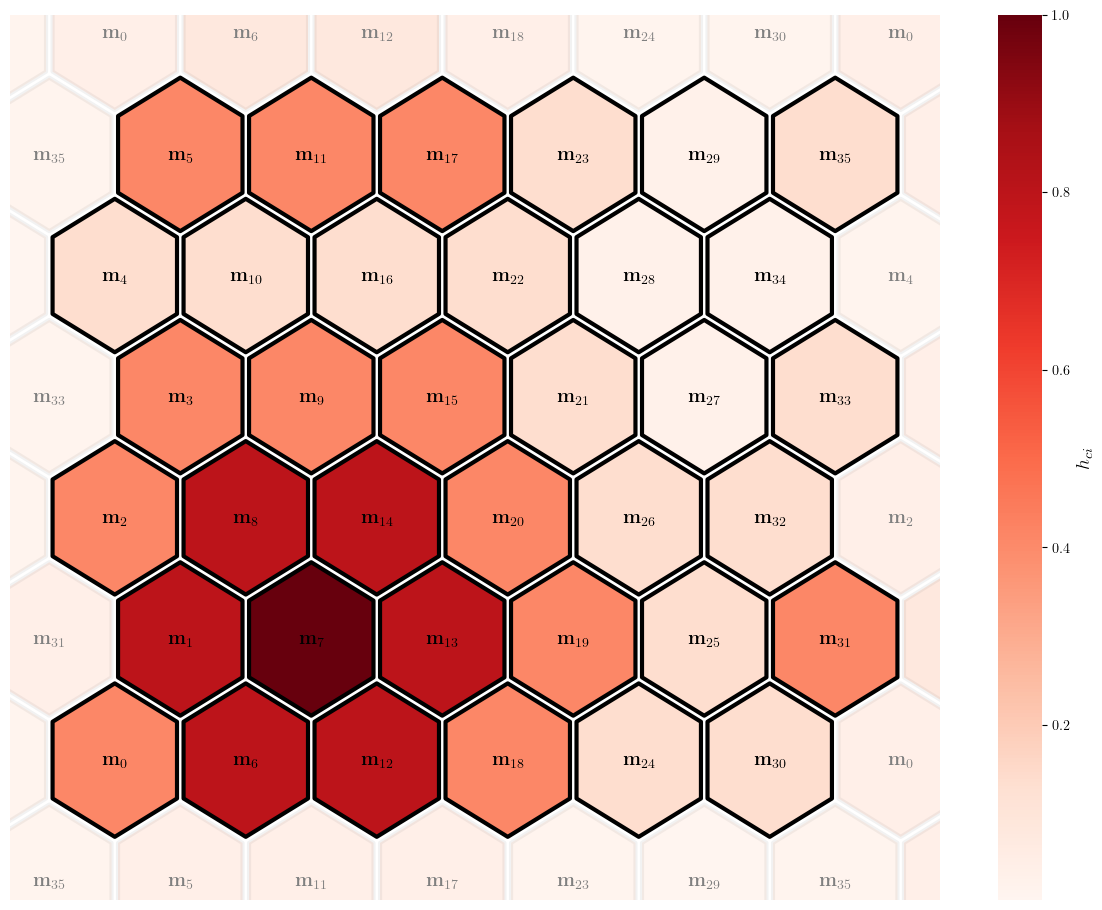

In [14]:
nei_caller = othernei.neighborhood_caller(7, 1.5, 'gaussian')[grid1]
nei_caller[outermask] /= 10
alphas[outermask] = 0.1
fig, ax = splots.plot_map(coords, nei_caller, 'hexagons', draw_cbar=True, figsize=(15, 11.5), show=False, edgecolors = edgecolors, cmap='Reds', cbar_label=r'$h_{ci}$', alphas=alphas, linewidths=3.)
xlims = [np.amin(coords[~outermask][:, 0]) - 0.8, np.amax(coords[~outermask][:, 0]) + 0.8]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
for i, c in enumerate(coords):
    x, y = c
    if x > xlims[0] and x < xlims[-1] and y > ylims[0] and y < ylims[-1]: 
        t = r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$'
        ax.text(x, y, r'$\mathbf{m}_{' + f'{grid1[i]}' + r'}$', va='center', ha='center', color=edgecolors[i])
ax.set_xlim(xlims)
ax.set_ylim(ylims)